In [1]:
import pandas as pd
import numpy as np
import sklearn.datasets
from sklearn.preprocessing import LabelEncoder
import autosklearn.classification
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [2]:
iris = sklearn.datasets.load_iris()
X = pd.DataFrame(iris.data)
y = pd.DataFrame(iris.target)

# df = pd.read_csv('https://raw.githubusercontent.com/mwaskom/seaborn-data/master/attention.csv')
# df = pd.read_csv('https://raw.githubusercontent.com/mwaskom/seaborn-data/master/exercise.csv')
# target = 'kind'

# X = df.drop(target, axis=1)
# X = df.iloc[:, 2:-1]
# y = df[target]

In [3]:
# df.head()

In [4]:
X.shape

(150, 4)

In [5]:
X.head(3)

,0,1,2,3
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2


In [6]:
# X['diet'] = LabelEncoder().fit_transform(X['diet'])
# X['time'] = LabelEncoder().fit_transform(X['time'])
y = LabelEncoder().fit_transform(y)

/Users/alex/anaconda/envs/p3/lib/python3.5/site-packages/sklearn/preprocessing/label.py:125: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [7]:
X.head()

,0,1,2,3
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [8]:
def run_train_test_split(df, target):
    from sklearn.cross_validation import train_test_split
    test_size = 0.2
    
    print("Train/test split executed, test size =", test_size)
    return train_test_split(df, target, test_size=test_size)

X_train, X_test, y_train, y_test = run_train_test_split(X, y)

X_train = np.ascontiguousarray(X_train)
X_test = np.ascontiguousarray(X_test)

print(type(X_train), type(y_train))
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

Train/test split executed, test size = 0.2
<class 'numpy.ndarray'> <class 'numpy.ndarray'>
(120, 4) (120,)
(30, 4) (30,)


In [9]:
X_train[:5]

array([[ 4.4,  2.9,  1.4,  0.2],
       [ 5.7,  4.4,  1.5,  0.4],
       [ 4.9,  3.1,  1.5,  0.1],
       [ 5.6,  2.8,  4.9,  2. ],
       [ 6.9,  3.1,  4.9,  1.5]])

In [10]:
y_train[:5]

array([0, 0, 0, 2, 1])

In [11]:
automl = autosklearn.classification.AutoSklearnClassifier(time_left_for_this_task=30, 
                                                          per_run_time_limit=1, 
                                                          ml_memory_limit=10000)
automl.fit(X_train, y_train)

[INFO] [2016-10-02 18:46:33,612:AutoML(1):c48f817ef0f7d853be2c45f7cf192801] Starting to create dummy predictions.
[INFO] [2016-10-02 18:46:33,659:AutoML(1):c48f817ef0f7d853be2c45f7cf192801] Finished creating dummy prediction 1/2.
[INFO] [2016-10-02 18:46:33,706:AutoML(1):c48f817ef0f7d853be2c45f7cf192801] Finished creating dummy prediction 2/2.
[INFO] [2016-10-02 18:46:34,625:AutoML(1):c48f817ef0f7d853be2c45f7cf192801] Start Ensemble with 28.97sec time left
[INFO] [2016-10-02 18:46:34,634:AutoML(1):c48f817ef0f7d853be2c45f7cf192801] Start SMAC with 28.96sec time left
[ERROR] [2016-10-02 18:46:34,647:EnsembleBuilder(1):c48f817ef0f7d853be2c45f7cf192801] Model only predicts at random: /tmp/autosklearn_tmp_12495_2686/.auto-sklearn/predictions_ensemble/predictions_ensemble_1_00001.npy has score: -0.0125
[INFO] [2016-10-02 18:46:34,653:EnsembleBuilder(1):c48f817ef0f7d853be2c45f7cf192801] Ensemble Selection:
	Trajectory: 0: 0.025000
	Members: [0]
	Weights: [ 1.]
	Identifiers: (1, 2)[INFO] [2016

/Users/alex/anaconda/envs/p3/lib/python3.5/site-packages/numpy/lib/nanfunctions.py:1147: RuntimeWarning: Degrees of freedom <= 0 for slice.
  warnings.warn("Degrees of freedom <= 0 for slice.", RuntimeWarning)
/Users/alex/anaconda/envs/p3/lib/python3.5/site-packages/numpy/lib/nanfunctions.py:675: RuntimeWarning: Mean of empty slice
  warnings.warn("Mean of empty slice", RuntimeWarning)


[INFO] [2016-10-02 18:46:35,843:AutoMLSMBO(1)::c48f817ef0f7d853be2c45f7cf192801] Calculating Metafeatures (categorical attributes) took  0.02
[INFO] [2016-10-02 18:46:35,885:AutoMLSMBO(1)::c48f817ef0f7d853be2c45f7cf192801] Calculating Metafeatures (encoded attributes) took  0.03sec


/Users/alex/anaconda/envs/p3/lib/python3.5/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)


[INFO] [2016-10-02 18:46:36,007:AutoMLSMBO(1)::c48f817ef0f7d853be2c45f7cf192801] Time left for c48f817ef0f7d853be2c45f7cf192801 after finding initial configurations: 25.59sec
[INFO] [2016-10-02 18:46:36,009:AutoMLSMBO(1)::c48f817ef0f7d853be2c45f7cf192801] Metafeatures for dataset c48f817ef0f7d853be2c45f7cf192801uiaeo
  SkewnessMax: 0.505614841839
  LogNumberOfFeatures: 1.38629436112
  SymbolsMax: 0
  KurtosisSTD: 0.678624438396
  KurtosisMean: -0.716045372742
  KurtosisMin: -1.34332293176
  NumberOfMissingValues: 0.0
  DatasetRatio: 0.03333333333333333
  NumberOfFeaturesWithMissingValues: 0.0
  SkewnessMin: -0.35391835594
  SymbolsSum: 0.0
  ClassProbabilityMean: 0.333333333333
  RatioNominalToNumerical: 0.0
  NumberOfNumericFeatures: 4
  PercentageOfMissingValues: 0.0
  LandmarkRandomNodeLearner: 0.573717948718
  ClassProbabilitySTD: 0.0136082763488
  LogInverseDatasetRatio: 3.40119738166
  SymbolsMin: 0
  SkewnessMean: 0.0587157331067
  ClassProbabilityMax: 0.35
  ClassProbabilityMin

In [12]:
print(automl.score(X_test,y_test))

0.9


In [13]:
predictions = automl.predict(X_test)
predictions

array([2, 2, 2, 0, 0, 2, 0, 1, 1, 0, 0, 2, 2, 0, 2, 1, 0, 1, 0, 1, 1, 1, 2,
       0, 1, 0, 0, 1, 1, 0])

In [14]:
probas = automl.predict_proba(X_test)
probas[0:5, :]

array([[  4.48000000e-02,   1.92800007e-01,   7.62400000e-01],
       [  0.00000000e+00,   1.80000007e-01,   8.20000000e-01],
       [  6.40000000e-03,   2.52794961e-01,   7.40805046e-01],
       [  8.20000000e-01,   1.80000007e-01,   4.20800051e-26],
       [  8.00800000e-01,   1.99200007e-01,   1.23984278e-28]])

In [16]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization
[[12  0  0]
 [ 0  8  0]
 [ 0  2  8]]
Normalized confusion matrix
[[ 1.   0.   0. ]
 [ 0.   1.   0. ]
 [ 0.   0.2  0.8]]


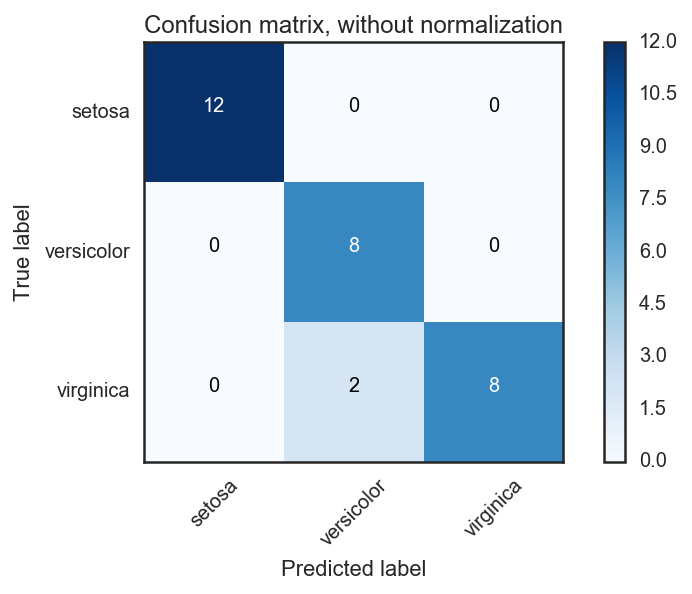

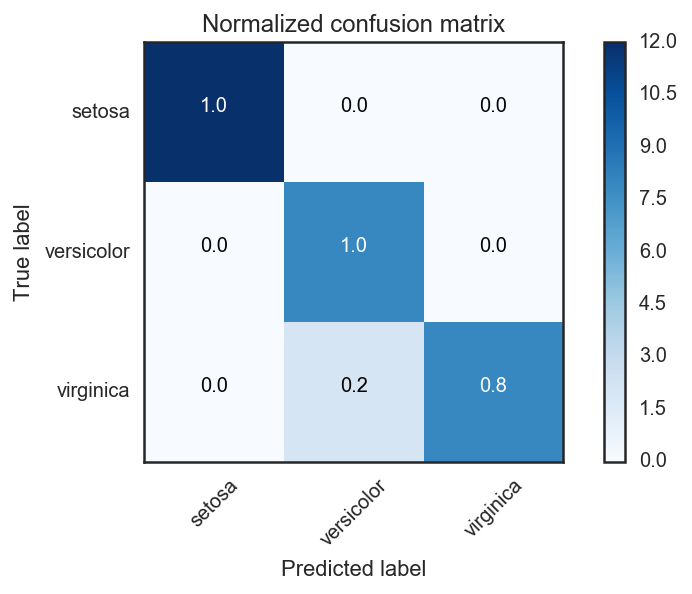

In [31]:
import itertools
from sklearn.metrics import confusion_matrix
import seaborn as sns

plt.style.use('seaborn-white')
class_names = iris.target_names

# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, predictions)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')